# **HackerEarth Prediction of Churn risk score.**

### **A Machine Learning Project**
#### by Olutayo Tosin Oladeinbo
   ***
### **Phase 3 Notebook Content:**
 1. Project Overview
 2. Notebook setup - Libraries and data imports
 3. Data Overview
 
***
### **1. Project Overview**
***
### **About Dataset**
##### **Problem Statement**
Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. . Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

**User demographic information**

Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

**Task**

Your task is to predict the churn score for a website based on the features provided in the dataset.

Data description
The dataset folder contains the following files:

train.csv: 36992 x 25
test.csv: 19919 x 24
sample_submission.csv: 5 x 2

Evaluation metric
         `score = 100 x metrics.f1_score(actual, predicted, average="macro")`

***
### **2. Notebook setup - Libraries and data imports**
***
Importing Libraries:

In [3]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
# from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Deep Learning Libraries
import tensorflow
from tensorflow import keras

##### Importing Data

In [2]:
data = pd.read_csv('train.csv')

##### Data Preview

In [3]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


##### View the Shape of the Data

In [4]:
data.shape

(36992, 25)

##### Statistical Summary of Numerical Columns

In [5]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [6]:
# Created a function to get necessary information from the data set in a dataframe
def get_data_info(data):
    dataset_info = pd.DataFrame(index=data.columns)
    dataset_info['Data_type'] = data.dtypes
    dataset_info['Total Value'] = data.count()
    dataset_info['Null_count'] = data.isnull().sum()
    dataset_info['Unique_count'] = data.nunique()
    return dataset_info

In [7]:
get_data_info(data)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,36992,0,36992
Name,object,36992,0,36992
age,int64,36992,0,55
gender,object,36992,0,3
security_no,object,36992,0,36992
region_category,object,31564,5428,3
membership_category,object,36992,0,6
joining_date,object,36992,0,1096
joined_through_referral,object,36992,0,3
referral_id,object,36992,0,11359


### DATA CLEANING

##### Handling Missing Values

In [8]:
data2 = data.fillna({'region_category':2,'points_in_wallet':data['points_in_wallet'].mode(),
                   'preferred_offer_types': 0})

##### Handling String Errors

In [9]:
print(set([data2 for data2 in data2['avg_frequency_login_days'] for a in data2 if a not in ['0','1','2','3','4','5','6','7','8','9','.','-']]))

{'Error'}


In [10]:
data3 = data2.replace({'avg_frequency_login_days': {'Error':0}})
data3['avg_frequency_login_days'] = data3['avg_frequency_login_days'].astype('float64')

##### Handling Negative Values

In [11]:
neg_values = data3[['avg_time_spent','days_since_last_login','points_in_wallet','churn_risk_score','avg_frequency_login_days']].min(axis=0)
neg_values[neg_values < 0]

avg_time_spent             -2814.109110
days_since_last_login       -999.000000
points_in_wallet            -760.661236
churn_risk_score              -1.000000
avg_frequency_login_days     -43.652702
dtype: float64

In [14]:
data3 = data3.drop(data3[data3['avg_time_spent'] < 0].index).copy()

data3 = data3.drop(data3[data3['days_since_last_login'] < 0].index).copy()

data3 = data3.drop(data3[data3['points_in_wallet'] < 0].index).copy()

data3 = data3.drop(data3[data3['churn_risk_score'] < 0].index).copy()

data4 = data3.drop(data3[data3['avg_frequency_login_days'] < 0].index).copy()

In [15]:
# Confirm
neg_values_check = data4[['avg_time_spent','days_since_last_login','points_in_wallet','churn_risk_score','avg_frequency_login_days']].min(axis=0)
neg_values_check[neg_values_check < 0]

Series([], dtype: float64)

### FEATURE ENGINEERING

##### Date Formating

In [16]:
data4['joining_date'] = data4['joining_date'].apply(pd.to_datetime)

In [17]:
data4['joining_date']

0       2017-08-17
1       2017-08-28
2       2016-11-11
3       2016-10-29
4       2017-09-12
           ...    
36985   2016-10-25
36986   2015-09-07
36989   2016-09-11
36990   2017-06-15
36991   2015-10-23
Name: joining_date, Length: 31618, dtype: datetime64[ns]

In [18]:
data4['Days_with_company'] = (data4['joining_date'] - data4['joining_date'].min())

In [19]:
data4['Days_with_company']

0       959 days
1       970 days
2       680 days
3       667 days
4       985 days
          ...   
36985   663 days
36986   249 days
36989   619 days
36990   896 days
36991   295 days
Name: Days_with_company, Length: 31618, dtype: timedelta64[ns]

In [20]:
data4['Days_with_company'] = data4['Days_with_company'].astype('str')
data4['Days_with_company'] = data4['Days_with_company'].str.split(" ",n=1,expand=True)[0]

In [21]:
data4['Days_with_company'] = data4['Days_with_company'].astype('int')

In [22]:
data4['last_visit_time']

0        16:08:02
1        12:38:13
2        22:53:21
3        15:57:50
4        15:46:44
           ...   
36985    03:30:17
36986    05:29:19
36989    03:50:25
36990    09:50:03
36991    01:39:52
Name: last_visit_time, Length: 31618, dtype: object

In [23]:
#getting the hours from last time visit
last_time_visit = data4['last_visit_time'].str.split(r":", expand=True)

#fill Nan values with zero before computing hour
data4['hour'] = last_time_visit[0].fillna(0).astype('int')
data4['min'] = last_time_visit[1].fillna(0).astype('int')
data4['sec'] = last_time_visit[2].fillna(0).astype('int')
data4['hour'] = data4['hour'] + (data4['min']/60) + data4['sec']/3600

In [29]:
data4 = data4.drop(['joining_date','min','sec','last_visit_time'], axis = 1).copy()
data4 = data4.replace({'medium_of_operation': {'?': 'Both'}})

In [24]:
#columns with minimum category
min_cat_cols = ['gender', 'region_category', 'membership_category',
                'joined_through_referral','preferred_offer_types',
                'medium_of_operation', 'internet_option', 'complaint_status',
                'used_special_discount','feedback','past_complaint',
                'offer_application_preference','churn_risk_score']

In [25]:
for col in min_cat_cols:
    print(data4[col].value_counts())
    print("****")

F          15833
M          15740
Unknown       45
Name: gender, dtype: int64
****
Town       12092
City       10846
2           4662
Village     4018
Name: region_category, dtype: int64
****
Basic Membership       6582
No Membership          6542
Gold Membership        5831
Silver Membership      5140
Premium Membership     3802
Platinum Membership    3721
Name: membership_category, dtype: int64
****
No     13570
Yes    13400
?       4648
Name: joined_through_referral, dtype: int64
****
Gift Vouchers/Coupons       10542
Credit/Debit Card Offers    10491
Without Offers              10341
0                             244
Name: preferred_offer_types, dtype: int64
****
Smartphone    11877
Desktop       11853
?              4624
Both           3264
Name: medium_of_operation, dtype: int64
****
Wi-Fi          10582
Fiber_Optic    10543
Mobile_Data    10493
Name: internet_option, dtype: int64
****
Not Applicable              15931
Solved                       3965
Unsolved                   

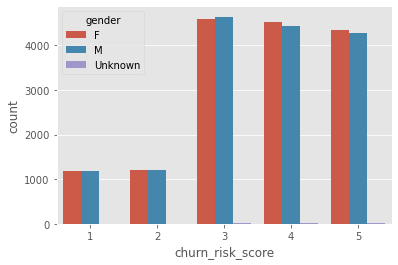

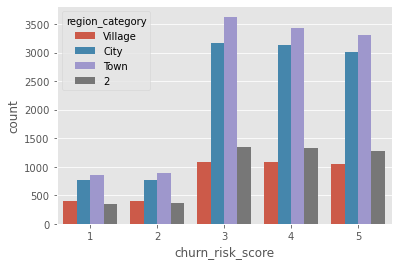

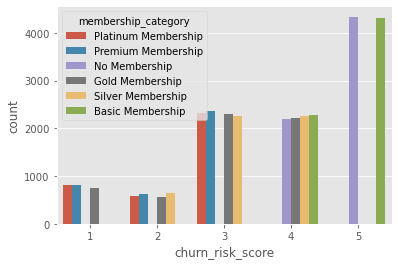

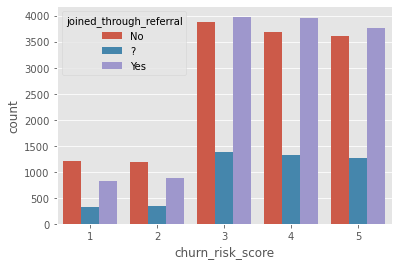

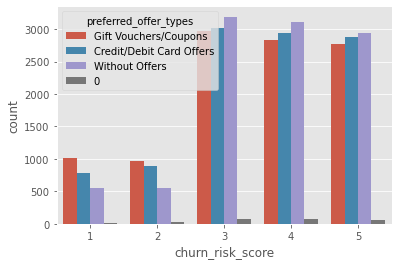

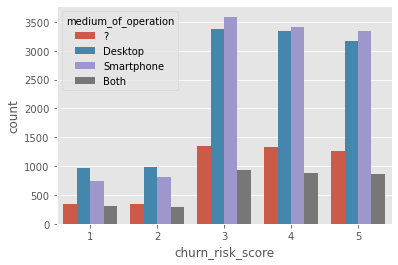

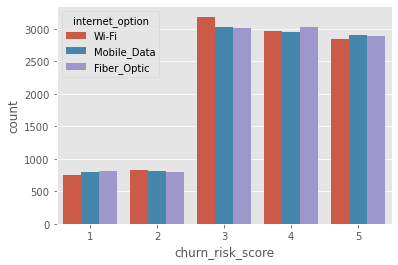

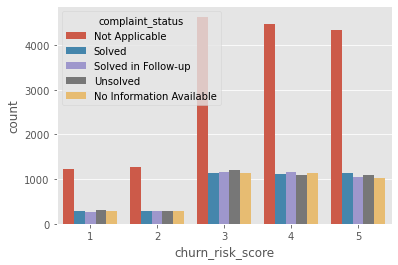

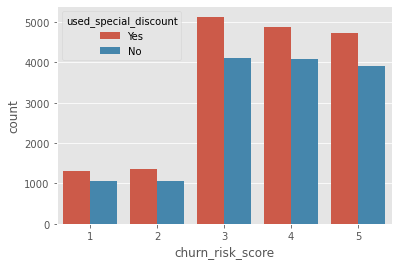

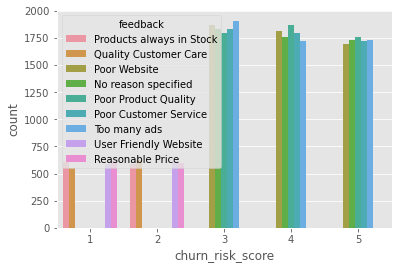

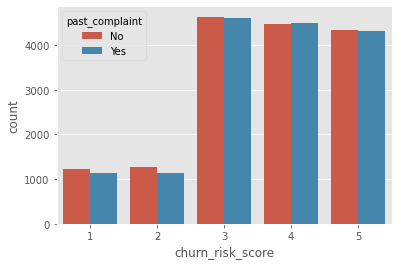

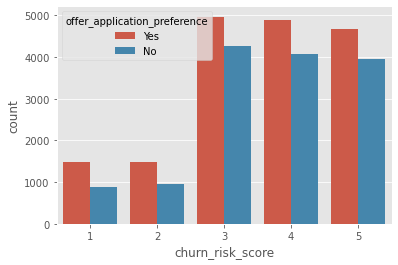

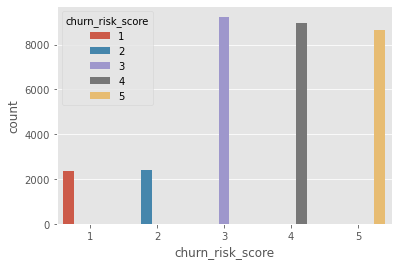

In [26]:
#asigning target column as category before visualization and model building      
data4['churn_risk_score'] = data4['churn_risk_score'].astype('category')

plt.style.use('ggplot')
for col in min_cat_cols:
    sns.countplot(x='churn_risk_score', data = data4, hue = col)
    plt.show()

In [31]:
# Numerical variables
numerical_col = [col for col in data4.columns if data4[col].dtype != "O" and data4[col].dtype != 'category']
numerical_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'Days_with_company',
 'hour']

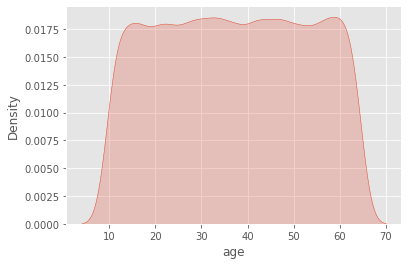

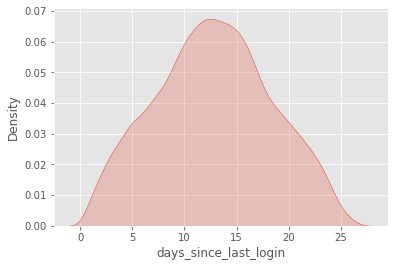

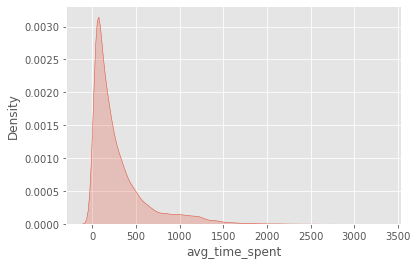

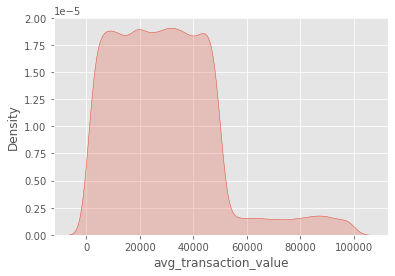

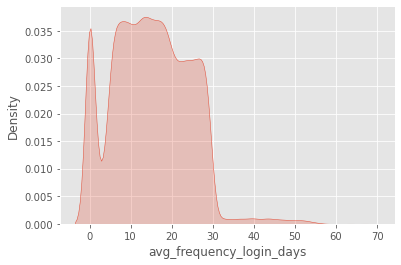

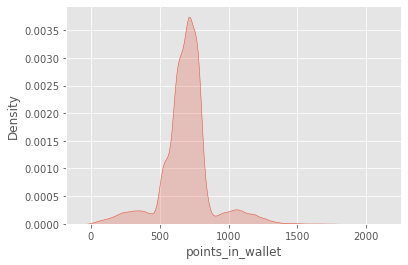

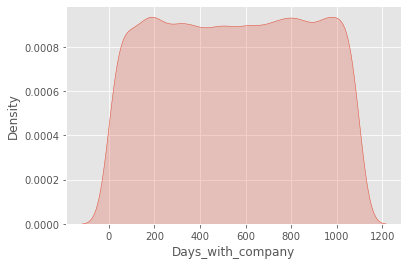

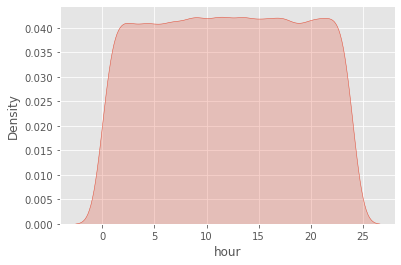

In [36]:
for var in [col for col in num_col if col != 'churn_risk_score']:
    sns.kdeplot(data=data4, x=var,shade=True)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()

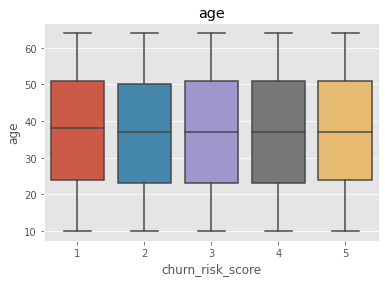

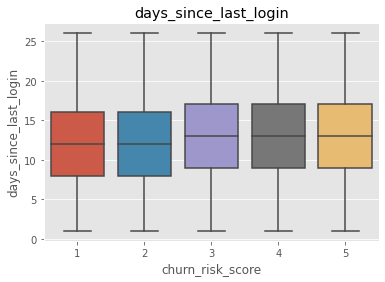

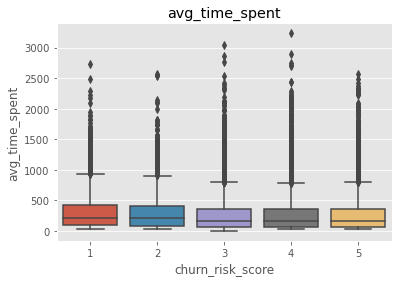

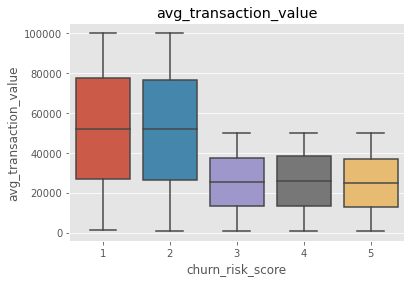

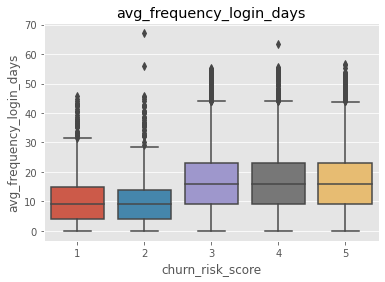

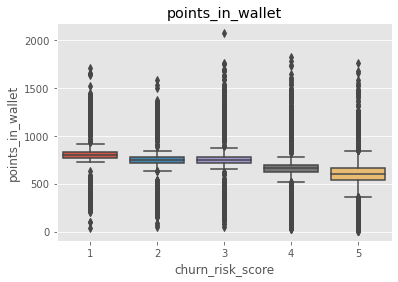

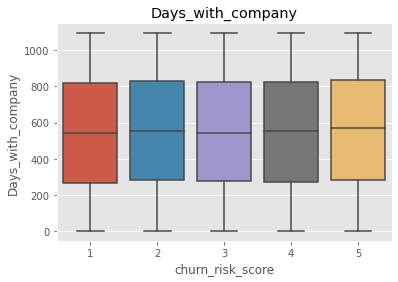

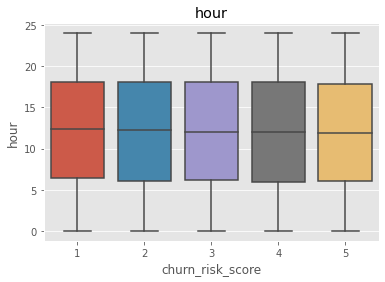

In [37]:
for feature in num_col:
    if feature != 'churn_risk_score':
        sns.boxplot(x ='churn_risk_score', y = feature, data = data4)
        plt.title(feature)
        plt.show()

In [38]:
get_data_info(data4)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31618,0,31618
Name,object,31618,0,31618
age,int64,31618,0,55
gender,object,31618,0,3
security_no,object,31618,0,31618
region_category,object,31618,0,4
membership_category,object,31618,0,6
joined_through_referral,object,31618,0,3
referral_id,object,31618,0,10294
preferred_offer_types,object,31618,0,4


In [39]:
#Drop row with others gender.It is less than 5%, so there's no need to keep it 
data4 = data4[data4.gender != 'Unknown']

In [40]:
get_data_info(data4)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31573,0,31573
Name,object,31573,0,31573
age,int64,31573,0,55
gender,object,31573,0,2
security_no,object,31573,0,31573
region_category,object,31573,0,4
membership_category,object,31573,0,6
joined_through_referral,object,31573,0,3
referral_id,object,31573,0,10283
preferred_offer_types,object,31573,0,4


In [41]:
# Changing 2 in region_category to Town
data4 = data4.replace({'region_category': {2: 'Town'}})

In [42]:
get_data_info(data4)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31573,0,31573
Name,object,31573,0,31573
age,int64,31573,0,55
gender,object,31573,0,2
security_no,object,31573,0,31573
region_category,object,31573,0,3
membership_category,object,31573,0,6
joined_through_referral,object,31573,0,3
referral_id,object,31573,0,10283
preferred_offer_types,object,31573,0,4


In [46]:
#code to get the dataframe with unknown referral status
Un_ref = data4[data4['joined_through_referral']== '?']

#code to divide the unkown into two equal part
index1= data4[data4['joined_through_referral']== '?'][:len(Un_ref) // 2].index
index2= data4[data4['joined_through_referral']== '?'][len(Un_ref) // 2 :].index

#code for allocating  Each half to Yes and No
data4.loc[index1,'joined_through_referral'] =  'Yes'
data4.loc[index2,'joined_through_referral'] =  'No'

In [47]:
get_data_info(data4)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31573,0,31573
Name,object,31573,0,31573
age,int64,31573,0,55
gender,object,31573,0,2
security_no,object,31573,0,31573
region_category,object,31573,0,3
membership_category,object,31573,0,6
joined_through_referral,object,31573,0,2
referral_id,object,31573,0,10283
preferred_offer_types,object,31573,0,4


In [48]:
data5 = data4[data4.preferred_offer_types != 0]

In [49]:
get_data_info(data5)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31330,0,31330
Name,object,31330,0,31330
age,int64,31330,0,55
gender,object,31330,0,2
security_no,object,31330,0,31330
region_category,object,31330,0,3
membership_category,object,31330,0,6
joined_through_referral,object,31330,0,2
referral_id,object,31330,0,10228
preferred_offer_types,object,31330,0,3


In [50]:
data5 = data5.replace({'medium_of_operation': {'?': 'Both'}})

In [51]:
get_data_info(data5)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31330,0,31330
Name,object,31330,0,31330
age,int64,31330,0,55
gender,object,31330,0,2
security_no,object,31330,0,31330
region_category,object,31330,0,3
membership_category,object,31330,0,6
joined_through_referral,object,31330,0,2
referral_id,object,31330,0,10228
preferred_offer_types,object,31330,0,3


In [57]:
data5 = data5.fillna({'points_in_wallet' : data5['points_in_wallet'].mean()})

In [58]:
get_data_info(data5)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31330,0,31330
Name,object,31330,0,31330
age,int64,31330,0,55
gender,object,31330,0,2
security_no,object,31330,0,31330
region_category,object,31330,0,3
membership_category,object,31330,0,6
joined_through_referral,object,31330,0,2
referral_id,object,31330,0,10228
preferred_offer_types,object,31330,0,3


In [67]:
#replacing values in columns for better understanding and reduced dimension
data5 = data5.replace({'complaint_status': {'Solved in Follow-up': 'Solved', 
                                        'No Information Available': 'Not Applicable'}})

data5 = data5.replace({'feedback': {'Poor Product Quality': 'Bad',
                                'Poor Website': 'Bad',
                                'Too many ads': 'Bad',
                                'Poor Customer Service': 'Bad',
                                'Reasonable Price': 'Good',
                                'User Friendly Website': 'Good',
                                'Products always in Stock': 'Good',
                                'Quality Customer Care': 'Good',
                                'No reason specified': 'Good'
                                }})

In [68]:
get_data_info(data5)

,Data_type,Total Value,Null_count,Unique_count
customer_id,object,31330,0,31330
Name,object,31330,0,31330
age,int64,31330,0,55
gender,object,31330,0,2
security_no,object,31330,0,31330
region_category,object,31330,0,3
membership_category,object,31330,0,6
joined_through_referral,object,31330,0,2
referral_id,object,31330,0,10228
preferred_offer_types,object,31330,0,3


In [59]:
#Outlier Detection

In [60]:
# From the above we can see there are some few outliers in some columns.
# We remove them using the standard deviation method. Any value above the 2 quartile will be removed

In [71]:
for i in num_col:
    upper_limit = data5[i].mean() + (2*data5[i].std())
    lower_limit = data5[i].mean() - (2*data5[i].std())
    data6 = data5[(data5[i]<upper_limit) & (data5[i]>lower_limit)]
data6.shape

(31330, 25)

In [73]:
data6.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Days_with_company,hour
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17.0,781.750000,Yes,Yes,No,Not Applicable,Good,2,959,16.133889
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,Yes,CID21329,Gift Vouchers/Coupons,...,10.0,690.684623,Yes,No,Yes,Solved,Good,1,970,12.636944
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22.0,500.690000,No,Yes,Yes,Solved,Bad,5,680,22.889167
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6.0,567.660000,No,Yes,Yes,Unsolved,Bad,5,667,15.963889
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16.0,663.060000,No,Yes,Yes,Solved,Bad,5,985,15.778889


In [75]:
# Drop irrelivant columns
data7 = data6.drop(['security_no', 'Name', 'customer_id','referral_id'], axis =1).copy()

In [76]:
data7.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Days_with_company,hour
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Both,Wi-Fi,17,300.63,...,17.0,781.750000,Yes,Yes,No,Not Applicable,Good,2,959,16.133889
1,32,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,...,10.0,690.684623,Yes,No,Yes,Solved,Good,1,970,12.636944
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,...,22.0,500.690000,No,Yes,Yes,Solved,Bad,5,680,22.889167
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,...,6.0,567.660000,No,Yes,Yes,Unsolved,Bad,5,667,15.963889
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,...,16.0,663.060000,No,Yes,Yes,Solved,Bad,5,985,15.778889


### Data Exploration

<AxesSubplot:>

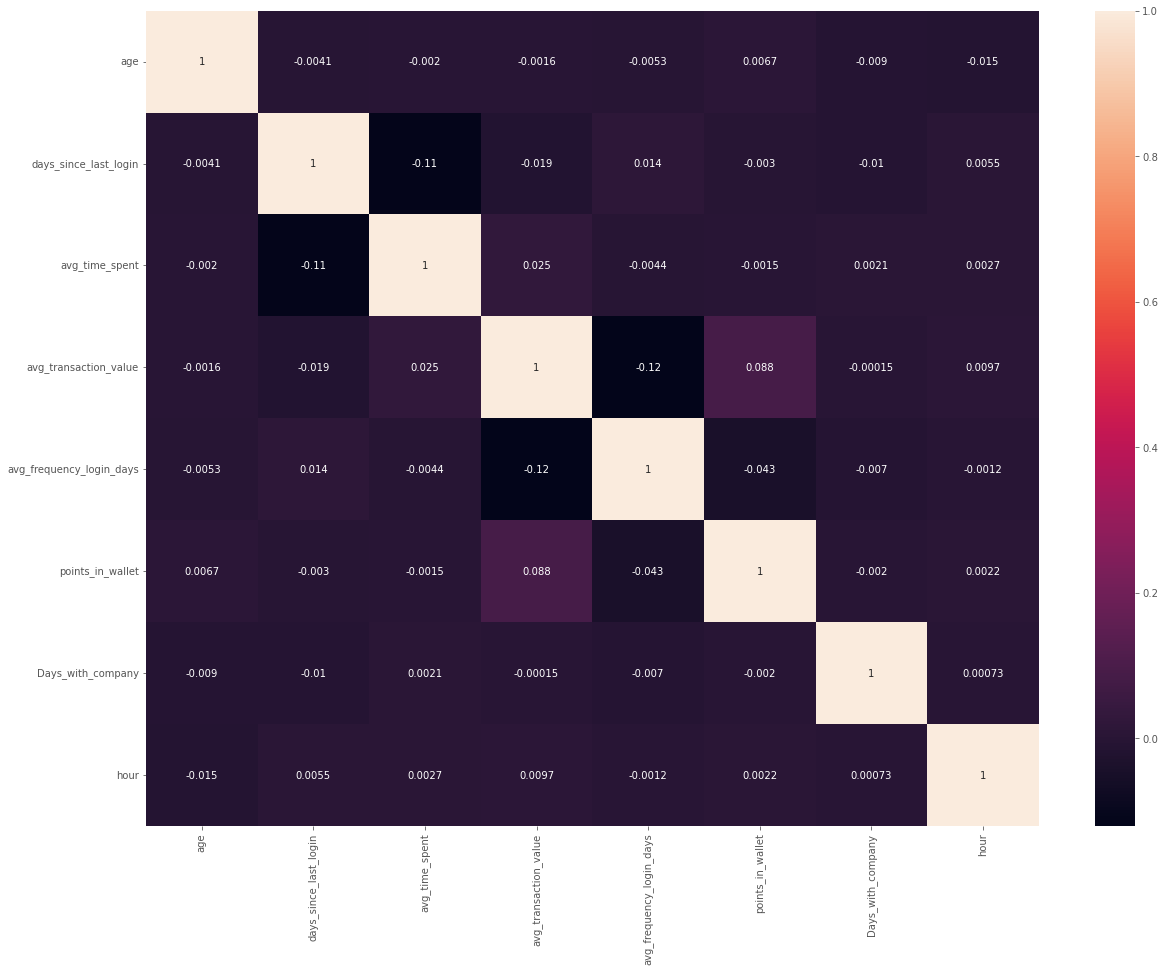

In [77]:
plt.figure(figsize= (20,15))
sns.heatmap(data7.corr(), annot= True)

In [66]:
#Total Customers by Gender
gender = data6.groupby('gender').count()['customer_id'].reset_index()

,gender,customer_id
0,F,15717
1,M,15613


### ML

In [78]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [80]:
for col in min_cat_cols:
    print(data7[col].value_counts())
    print("****")

F    15717
M    15613
Name: gender, dtype: int64
****
Town       16600
City       10748
Village     3982
Name: region_category, dtype: int64
****
Basic Membership       6522
No Membership          6479
Gold Membership        5775
Silver Membership      5092
Premium Membership     3770
Platinum Membership    3692
Name: membership_category, dtype: int64
****
No     15770
Yes    15560
Name: joined_through_referral, dtype: int64
****
Gift Vouchers/Coupons       10524
Credit/Debit Card Offers    10476
Without Offers              10330
Name: preferred_offer_types, dtype: int64
****
Smartphone    11763
Desktop       11750
Both           7817
Name: medium_of_operation, dtype: int64
****
Wi-Fi          10477
Fiber_Optic    10451
Mobile_Data    10402
Name: internet_option, dtype: int64
****
Not Applicable    19612
Solved             7784
Unsolved           3934
Name: complaint_status, dtype: int64
****
Yes    17242
No     14088
Name: used_special_discount, dtype: int64
****
Bad     21321
Good   

In [81]:
ordinal_columns = ['region_category','membership_category']

In [82]:
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
# fitting encoder ti region ctegory
ord1.fit([data7['region_category']])
# transforming the column after fitting
data7["region_category"]= ord1.fit_transform(data7[["region_category"]])

ord2 = OrdinalEncoder()
# fitting encoder ti membership ctegory
ord2.fit([data7['membership_category']])
# transforming the column after fitting
data7["membership_category"]= ord2.fit_transform(data7[["membership_category"]])

In [83]:
data7.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Days_with_company,hour
0,18,F,2.0,3.0,No,Gift Vouchers/Coupons,Both,Wi-Fi,17,300.63,...,17.0,781.750000,Yes,Yes,No,Not Applicable,Good,2,959,16.133889
1,32,F,0.0,4.0,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,...,10.0,690.684623,Yes,No,Yes,Solved,Good,1,970,12.636944
2,44,F,1.0,2.0,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,...,22.0,500.690000,No,Yes,Yes,Solved,Bad,5,680,22.889167
3,37,M,0.0,2.0,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,...,6.0,567.660000,No,Yes,Yes,Unsolved,Bad,5,667,15.963889
4,31,F,0.0,2.0,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,...,16.0,663.060000,No,Yes,Yes,Solved,Bad,5,985,15.778889


In [88]:
columns_ = ['gender','joined_through_referral','preferred_offer_types','internet_option','medium_of_operation','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']
data8 = data7.copy()
for i in columns_:
    data8[i] = le.fit_transform(data8[i])
data8.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Days_with_company,hour
0,18,0,2.0,3.0,0,1,0,2,17,300.63,...,17.0,781.750000,1,1,0,0,1,2,959,16.133889
1,32,0,0.0,4.0,1,1,1,1,16,306.34,...,10.0,690.684623,1,0,1,1,1,1,970,12.636944
2,44,0,1.0,2.0,1,1,1,2,14,516.16,...,22.0,500.690000,0,1,1,1,0,5,680,22.889167
3,37,1,0.0,2.0,1,1,1,1,11,53.27,...,6.0,567.660000,0,1,1,2,0,5,667,15.963889
4,31,0,0.0,2.0,0,0,2,1,20,113.13,...,16.0,663.060000,0,1,1,1,0,5,985,15.778889


In [89]:
data8.churn_risk_score.value_counts()

3    9154
4    8867
5    8567
2    2396
1    2346
Name: churn_risk_score, dtype: int64

In [90]:
X = data8.drop(['churn_risk_score'],axis='columns')
X.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,Days_with_company,hour
0,18,0,2.0,3.0,0,1,0,2,17,300.63,53005.25,17.0,781.750000,1,1,0,0,1,959,16.133889
1,32,0,0.0,4.0,1,1,1,1,16,306.34,12838.38,10.0,690.684623,1,0,1,1,1,970,12.636944
2,44,0,1.0,2.0,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,1,0,680,22.889167
3,37,1,0.0,2.0,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,2,0,667,15.963889
4,31,0,0.0,2.0,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,1,0,985,15.778889


In [91]:
y = data8.churn_risk_score
y[:5]

0    2
1    1
2    5
3    5
4    5
Name: churn_risk_score, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [360]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)

In [361]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25064, 20), (6266, 20), (25064,), (6266,))

In [205]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [362]:
# Create an object of a SMOTE (Oversampling library)
sm = SMOTE(random_state=0)
# Performing oversampling on our train set
X_train,y_train = sm.fit_resample(X_train,y_train)

In [363]:
# Create an object of our scaling class
scaler = StandardScaler()
# Scale our X set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
RF = RandomForestClassifier(n_estimators=500,n_jobs=1)

In [166]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1)

In [167]:
RF.score(X_test,y_test)

0.7440153207788063

In [168]:
KN = KNeighborsClassifier(algorithm='ball_tree',n_jobs=1,n_neighbors= 200,weights='distance')

In [169]:
KN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=200,
                     weights='distance')

In [170]:
KN.score(X_test,y_test)

0.4979253112033195

## 

In [173]:
GB = GradientBoostingClassifier(learning_rate=0.01,max_depth=70,max_features=1,n_estimators=200)

In [174]:
GB.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=70, max_features=1,
                           n_estimators=200)

In [175]:
GB.score(X_test,y_test)

0.7090647941270348

In [198]:
DT = DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [199]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [200]:
DT.score(X_test,y_test)

0.7376316629428663

In [202]:
LR = LogisticRegression(C=1,multi_class='auto',penalty='none',solver='saga')

In [203]:
LR.fit(X_train,y_train)

C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, penalty='none', solver='saga')

In [204]:
LR.score(X_test,y_test)

0.476380466007022

In [206]:
SV = SVC()

In [207]:
SV.fit(X_train,y_train)

SVC()

In [208]:
SV.score(X_test,y_test)

0.54787743376955

### PCA

Use PCA and LDA to reduce data dimensions, then fit to ML models, to see if accuracy is improved.

Dimensionality reduction is an unsupervised learning technique. PCA is an unsupervised method and does not use any class information, it simply looks at the correlations in the data. PCA can be used as a data transform pre-processing step for machine learning algorithms on classification and regression predictive modeling datasets with supervised learning algorithms.

In [209]:
from sklearn.decomposition import PCA

##### PCA10

In [211]:
# Define Principle Component Analysis model.
# Reduce dimensions.
pca10 = PCA(n_components=10)
pca10.fit(X)
data_pca10 = pca10.transform(X)

In [212]:
data_pca10

array([[ 2.37067728e+04,  7.46273102e+00, -4.07674414e+02, ...,
         4.29972180e+00, -5.24522147e-01, -1.10107608e+00],
       [-1.64601506e+04,  3.07083762e+01, -4.18108523e+02, ...,
         3.27934960e+00, -1.87049390e+00,  2.43464468e-01],
       [-8.27159627e+03,  2.30572643e+02, -1.23554501e+02, ...,
         1.42915889e+00, -1.54561159e-01, -5.41040626e-01],
       ...,
       [ 8.82894775e+03, -1.39744975e+02, -7.12166857e+01, ...,
        -7.37368701e-01,  2.39398886e+00, -2.54723909e-01],
       [-2.69199857e+04,  2.10956056e+02, -3.40495022e+02, ...,
         2.51609053e+00, -1.80738823e+00, -1.75800778e-01],
       [-2.71089174e+04, -2.08143806e+02,  2.51438847e+02, ...,
         1.93623067e+00, -2.81575357e+00, -2.32237691e-01]])

In [284]:
X_train,X_test,y_train,y_test = train_test_split(data_pca10,y,test_size=0.2,random_state=10,stratify=y)

In [285]:
# Performing oversampling on our train set
X_train,y_train = sm.fit_resample(X_train,y_train)

In [286]:
# Create an object of our scaling class
scaler = StandardScaler()
# Scale our X set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [290]:
RF = RandomForestClassifier(n_estimators=500,n_jobs=1)

In [291]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1)

In [292]:
RF.score(X_test,y_test)

0.7205553782317268

In [293]:
KN = KNeighborsClassifier(algorithm='ball_tree',n_jobs=1,n_neighbors= 200,weights='distance')
KN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=200,
                     weights='distance')

In [294]:
KN.score(X_test,y_test)

0.4854771784232365

In [295]:
GB = GradientBoostingClassifier(learning_rate=0.01,max_depth=70,max_features=1,n_estimators=200)
GB.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=70, max_features=1,
                           n_estimators=200)

In [296]:
GB.score(X_test,y_test)

0.7028407277369932

In [297]:
DT = DecisionTreeClassifier(criterion='entropy',max_depth=10)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [298]:
DT.score(X_test,y_test)

0.6994893073731248

In [299]:
SV = SVC()
SV.fit(X_train,y_train)

SVC()

In [300]:
SV.score(X_test,y_test)

0.5887328439195659

In [301]:
# PCA10 didn't make any significant difference. So we try PCA5

##### PCA5

In [302]:
X

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,Days_with_company,hour
0,18,0,2.0,3.0,0,1,0,2,17,300.63,53005.25,17.0,781.750000,1,1,0,0,1,959,16.133889
1,32,0,0.0,4.0,1,1,1,1,16,306.34,12838.38,10.0,690.684623,1,0,1,1,1,970,12.636944
2,44,0,1.0,2.0,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,1,0,680,22.889167
3,37,1,0.0,2.0,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,2,0,667,15.963889
4,31,0,0.0,2.0,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,1,0,985,15.778889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,0,2.0,4.0,0,1,1,0,13,418.38,56397.21,7.0,725.890000,1,1,1,2,1,663,3.504722
36986,27,1,1.0,3.0,1,0,1,1,13,135.83,8225.68,16.0,748.570000,1,0,0,0,1,249,5.488611
36989,23,0,1.0,0.0,1,1,1,2,12,154.94,38127.56,0.0,680.470000,0,1,1,2,0,619,3.840278
36990,53,1,2.0,3.0,0,1,2,1,15,482.61,2378.86,20.0,197.264414,1,1,0,0,1,896,9.834167


In [303]:
# Define Principle Component Analysis model.
# Reduce dimensions.
pca5 = PCA(n_components=5)
pca5.fit(X)
data_pca5 = pca5.transform(X)
data_pca5

array([[ 2.37067728e+04,  7.46273102e+00, -4.07674414e+02,
         7.27540680e+01,  1.89819130e+01],
       [-1.64601506e+04,  3.07083762e+01, -4.18108523e+02,
         1.38795183e+01,  4.91819293e+00],
       [-8.27159627e+03,  2.30572643e+02, -1.23554501e+02,
        -1.82564915e+02, -6.96689679e+00],
       ...,
       [ 8.82894775e+03, -1.39744975e+02, -7.12166857e+01,
        -1.75357423e+01,  1.39184639e+01],
       [-2.69199857e+04,  2.10956056e+02, -3.40495022e+02,
        -4.70807810e+02, -1.63323531e+01],
       [-2.71089174e+04, -2.08143806e+02,  2.51438847e+02,
         5.00081012e+01,  2.13998772e+00]])

In [304]:
X_train,X_test,y_train,y_test = train_test_split(data_pca5,y,test_size=0.2,random_state=10,stratify=y)

In [305]:
# Performing oversampling on our train set
X_train,y_train = sm.fit_resample(X_train,y_train)

In [306]:
# Create an object of our scaling class
scaler = StandardScaler()
# Scale our X set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [307]:
RF = RandomForestClassifier(n_estimators=500,n_jobs=1)

In [308]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1)

In [309]:
RF.score(X_test,y_test)

0.6172997127353974

In [310]:
KN = KNeighborsClassifier(algorithm='ball_tree',n_jobs=1,n_neighbors= 200,weights='distance')
KN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=200,
                     weights='distance')

In [311]:
KN.score(X_test,y_test)

0.5831471433131185

In [312]:
GB = GradientBoostingClassifier(learning_rate=0.01,max_depth=70,max_features=1,n_estimators=200)
GB.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=70, max_features=1,
                           n_estimators=200)

In [313]:
GB.score(X_test,y_test)

0.6018193424832429

In [314]:
DT = DecisionTreeClassifier(criterion='entropy',max_depth=10)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [315]:
DT.score(X_test,y_test)

0.6244813278008299

In [316]:
SV = SVC()
SV.fit(X_train,y_train)

SVC()

In [317]:
SV.score(X_test,y_test)

0.5916054899457389

In [318]:
## Taking way too long to run. 
## Skip this

#PCA5 doesn't make any significant difference too.
#Let's try GridSearchCV

In [325]:
#Python Dictionary with 5 supervised models and parameters to choose the best Models and Parameters to use.

# model_params = {
#     'Decision Tree': {
#         'model' : DecisionTreeClassifier(),
#         'params' : {
#             'criterion':['gini','entropy'],
#             'splitter': ['best','random'],
#             'max_depth': [10,20,30,100],
#         }
#     },
#     'Random_forest':{
#         'model' : RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,100],
#             'n_jobs': [1,10,20],
#         }
#     },
#     'Logistic_regression' :{
#         'model' : LogisticRegression(),
#         'params': {
#             'C': [1,5,10],
#             'solver':['liblinear','saga'],
#             'multi_class':['auto'],
#             'penalty': ['l1','l2','elasticnet','none']
#         }
#     },
#     'K_Nearest_Neighbour' :{
#         'model' : KNeighborsClassifier(),
#         'params' :{
#             'n_neighbors': [1,5,10],
#             'algorithm': ["auto", "brute", "kd_tree", "ball_tree"],
#             'weights': ['uniform','distance'],
#         }
#     }
# #     'Gradient_Boost': {
# #         'model': GradientBoostingClassifier(),
# #         'params' :{
# #             'learning_rate': [0.01],
# #             'max_depth': [50,70], 
# #             'max_features': [1,2], 
# #             'n_estimators': [200,300]
# #         }
# #     }
# }

In [326]:
# scores = []
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)
# sm = SMOTE(random_state=0)
# X_train,y_train = sm.fit_resample(X_train,y_train)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# for model_name,mp in model_params.items():
#     rs = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
#     rs.fit(X_train,y_train)
#     scores.append({
#         'Model': model_name,
#         'Best_Score': rs.best_score_,
#         'Best_Parameters':rs.best_params_
#     })

C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [ ]:
# pd.options.display.max_colwidth = 200
# scoresdf = pd.DataFrame(scores,columns=['Model','Best_Score','Best_Parameters'])
# scoresdf.sort_values(by='Best_Score',ascending=False, inplace=True)
# scoresdf

### Deep Learning

In [364]:
X_test

array([[ 0.141773  , -0.84847056,  0.31619628, ..., -1.03352633,
        -0.84639432,  0.12058034],
       [ 0.74543439, -0.84847056,  0.31619628, ..., -1.03352633,
         1.27442214,  1.12307434],
       [-0.66310885,  1.17859127, -1.28817934, ..., -1.03352633,
         0.11702535, -0.09801144],
       ...,
       [-1.26677023, -0.84847056, -1.28817934, ..., -1.03352633,
         0.6989567 , -0.96686502],
       [ 1.28202228, -0.84847056, -1.28817934, ..., -1.03352633,
         1.13217226,  1.7226113 ],
       [ 0.94665485, -0.84847056, -1.28817934, ..., -1.03352633,
        -1.30870644, -0.49651522]])

In [379]:
# We have alot of entries so let's start with 3 hidden layers

DL_model = keras.Sequential([
                          keras.layers.Dense(1000, input_shape=(20,), activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(500,activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(250,activation='relu'),
                          keras.layers.Dense(100,activation='relu'),
                          keras.layers.Dense(6, activation='softmax')
])

DL_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
history = DL_model.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
1145/1145 [==============================] - 35s 30ms/step - loss: 0.8521 - accuracy: 0.5853 - val_loss: 0.7418 - val_accuracy: 0.6574
Epoch 2/30
1145/1145 [==============================] - 35s 30ms/step - loss: 0.6505 - accuracy: 0.6905 - val_loss: 0.6126 - val_accuracy: 0.6944
Epoch 3/30
1145/1145 [==============================] - 39s 34ms/step - loss: 0.5899 - accuracy: 0.7122 - val_loss: 0.5390 - val_accuracy: 0.7180
Epoch 4/30
1145/1145 [==============================] - 38s 33ms/step - loss: 0.5589 - accuracy: 0.7193 - val_loss: 0.5373 - val_accuracy: 0.7228
Epoch 5/30
1145/1145 [==============================] - 38s 33ms/step - loss: 0.5412 - accuracy: 0.7290 - val_loss: 0.5200 - val_accuracy: 0.7279
Epoch 6/30
1145/1145 [==============================] - 39s 34ms/step - loss: 0.5280 - accuracy: 0.7313 - val_loss: 0.5158 - val_accuracy: 0.7233
Epoch 7/30
1145/1145 [==============================] - 38s 33ms/step - loss: 0.5180 - accuracy: 0.7398 - val_loss: 0.5062 -

In [371]:
DL_model.evaluate(X_test,y_test)

196/196 [==============================] - 1s 6ms/step - loss: 0.6716 - accuracy: 0.7215


[0.6716117858886719, 0.7215129137039185]

In [372]:
y_pred = DL_model.predict(X_test)
y_pred_label = [np.argmax(i) for i in y_pred]

196/196 [==============================] - 1s 6ms/step


In [373]:
print(classification_report(y_test,y_pred_label))

              precision    recall  f1-score   support

           1       0.59      0.72      0.65       469
           2       0.54      0.50      0.52       479
           3       0.89      0.78      0.83      1831
           4       0.70      0.53      0.61      1774
           5       0.68      0.91      0.78      1713

    accuracy                           0.72      6266
   macro avg       0.68      0.69      0.68      6266
weighted avg       0.73      0.72      0.72      6266



In [374]:
f1_score(y_test, y_pred_label, average="macro")

0.6773703305219414

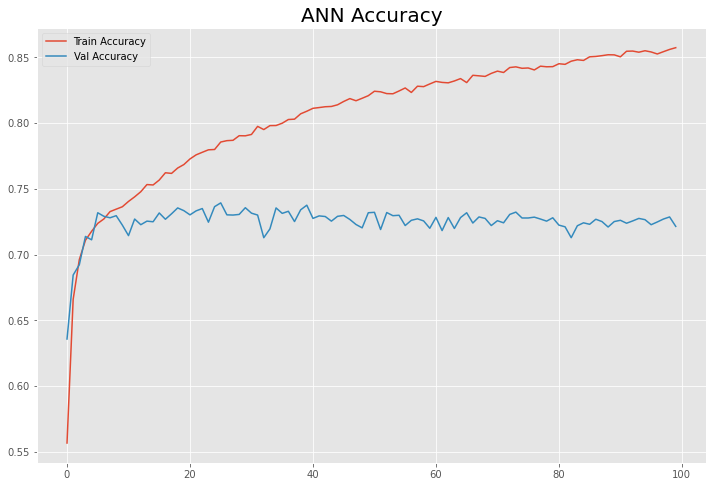

196/196 [==============================] - 1s 7ms/step - loss: 0.6716 - accuracy: 0.7215
Neural Network score     ========>>> 0.722


In [378]:
## Plot History
fig = plt.figure(figsize=(12, 8))
plt.title('ANN Accuracy', size=20)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.show()
DL_model.evaluate(X_test,y_test)
score = np.round(DL_model.evaluate(X_test, y_test, verbose=0)[1], 3)
print(f'Neural Network score     ========>>> {score}')